# A comprehensive tutorial on KNN Algorithm



## Motivation

The KNN algorithm is a robust and versatile classifier used for predictive problems.KNN is often used as a standard point of reference for complex classifiers such as Support Vector Machines and Artificial Neural Networks.KNN has a lot of industry applications such as data compression,economic forecasting,Protein-Protein interaction and 3D structure prediction to name a few.

## What is KNN?

KNN is K - Nearest Neighbors.

KNN is non-parametric, instance based and falls in the supervised learning family of algorithms.
Let's consider an example where we have to predict the 'quality' of wine.'quality' is the target variable with labels 'good','bad' and the data is the characteristics of the wine like alcohol content,pH,density.These are the predictor variables. So, given a new unlabeled wine , the classification task will predict the 'quality' of wine.

This a general classification task.What is so special about KNN?

The KNN algorithm performs this classification by using the labels of the K - nearest nearest samples to define the label of the new unknown sample.That is classification is performed by considering the majority vote of the nearest neighbors of the unknown sample.


## A visual description of KNN Algorithm 

This is an image which is an example of KNN in 2-D. 
Consider the green circle as the new test data point which is unlabelled.

What should be the label for the green circle?
<img src="sample.png">

To answer this question we need to know the value of K.
If the value of K is 3, you would clasify it as red and, if value of K is 5 it would be blue.

How?
When K = 3 ,in the nearest neighbors -  we have 2 Red and 1 Blue (Notice the solid circle around it), so red wins.
When K = 5 ,in the nearest neighbors -  we have 2 Red and 3 Blue (Notice the dotted circle around it), so blue wins.


## Tutorial Content


In this tutorial we learn how to implement KNN from scratch and also through standard packages.
This tutorial is broken down into several steps:

[1 Perform necessary imports](#Perform necessary imports)<br>
[2 Loading and visualizing the data](#Load data)<br>
[3 Split data to Train/Test Data](#Split data)<br>
[4 Implemet KNN from scratch](#implement from scratch)
<ul>
    <li>4.1 Calculate the Euclidean distance</li>
    <li>4.2 Fetch Neighbors</li>
    <li>4.3 Majority Voting for Neighbors</li>
    <li>4.4 Find Accuracy</li>
    <li>4.5 Implement Harmonic Weights to predict</li>
</ul>
[5 Implemet KNN with package](#Implement with package)
<ul>
    <li>5.1 Implement,Predict KNN model</li>
    <li>5.2 Cross Validation for hyperparameter tuning</li>
</ul>




### 1)  Performing the necessary imports
<a id='Perform necessary imports'></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import pandas as pd
import collections
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt


### 2) Loading and visualizing the data
<a id='Load data'></a>

For this tutorial we will be using the iris data set from sklearn.datasets.
The iris dataset is a multivariate data set.The data contains four features - 'sepal length','sepal width',  'petal length','petal width' of the three Iris species (Iris setosa, Iris virginica and Iris versicolor).The dataset contains 50 samples from each of the Iris species.

iris_content contains the four features, iris_target_label contains the labels which identifies the type of Iris species.

Here is a quick look of the data , on how it look like.
Notice that the labels - Iris setosa, Iris virginica and Iris versicolor are encoded as 0,1,2.
This can be encoded if the data is required to be showcased.But for now , we play around with the labels with the numbers - 0,1,2.

In [3]:
iris = load_iris()
iris_target_label = iris.target
iris_content = iris.data
iris_df = pd.DataFrame(data=iris_content, columns=['sepal_length','sepal_width',  'petal_length','petal_width'])
iris_df['category'] = iris_target_label
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  category
0           5.1          3.5           1.4          0.2         0
1           4.9          3.0           1.4          0.2         0
2           4.7          3.2           1.3          0.2         0
3           4.6          3.1           1.5          0.2         0
4           5.0          3.6           1.4          0.2         0



Before we jump onto building the model ,let's visualize what our data looks like.This is a crucial step because it gives us an understanding of the data and the purpose of the model. Here we are building two scatterplots. The first one is sepal length vs sepal width.The colors in the graph are based on the three classes of Iris Species. A quick observation of the scatterplot tells us that setosa(red color) has wider and shoter sepals when compared to virginica,versicolor.


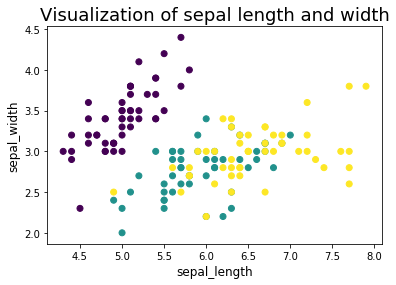

In [4]:
colors = ('r','g','b')
plt.ylabel("sepal_width", fontsize=12)
plt.xlabel("sepal_length", fontsize=12)
plt.title('Visualization of sepal length and width', fontsize=18)
plt.scatter(iris_df['sepal_length'],iris_df['sepal_width'],c=iris_df['category'])
plt.show()


A scatter plot of petal length vs petal width tells us that , setosa(red) stands out with the shortest and thinnest petal.Whereas, for most of the data points virginica(yellow) has the longest and widest petals.


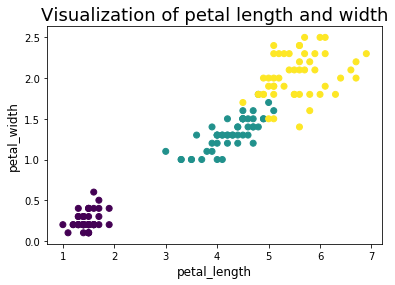

In [5]:
colors = ('r','g','b')
plt.ylabel("petal_width", fontsize=12)
plt.xlabel("petal_length", fontsize=12)
plt.title('Visualization of petal length and width', fontsize=18)
plt.scatter(iris_df['petal_length'],iris_df['petal_width'],c=iris_df['category'])
plt.show()

### 3) Split data to Train/Test Data
<a id='Split data'></a>

The first step before we start implementing our KNN Algorithm is to split the data into Training and Testing sets.The training data will be used to make the predictions and the test data is used to evaluate the accuracy of the model. We split the data in the ratio 67:33 for train:test.This is a standard train:test ratio.

Here, train_data and train_labels is responsible to create the prediction model, where train_data is the input and the train_labels is the output.Similarly, test_data and test_labels are the features and the labels for evaluating the accuracy of the model.

In [7]:
df_content = pd.DataFrame(iris_content)
train_data, test_data, train_labels, test_labels = train_test_split(df_content, iris_target_label, test_size=0.33, random_state=42)
train_data = train_data.values
test_data = test_data.values

### 4) Implement KNN from Scratch
<a id='implement from scratch'></a>

So let's get started!!

To predict the label of a particular data point using KNN , we need to determine the similarity between the two data instances(One being the new data point[test] and the other being the existing data point[training]).This will be helpful to figure out the K most similar data instances in the training dataset for that test data point.

Considering all the four features are in the same units we can directly use the Euclidean distance measure.This is defined as the square root of the sum of the squared differences of the numbers.

The below method 'euclidean_distance' is used to get distance between two data points.


In [8]:
import math
def euclidean_distance(first, second):
    
    result = 0
    distance = 0
#     print(first)
    first = np.array(first)
#     print(second)
    second = np.array(second)
    
    for m in range(first.size):
        distance =distance+ pow((first[m]-second[m]), 2)
        
    result = math.sqrt(distance)
    return result

We now have the similarity measure, from this we can get the K most similar instance for a particular data point.
The 'fetch_neighbors' function , receives the value of K , a set of training data and their labels and a test data instance.The function returns the K most similar neighbors from the training set for a given test instance.

The approach taken to acheive this is: <br>
1) Calculate the euclidean_distance between the particular test data instance and every  training data instance.<br>
2) Filter out the K most closest data points as neighbors.


In [9]:
def fetch_neighbors(k,training_data,output,testing_data):
    size = len(training_data)
    distances = []
    neighbors = []
    for i in range(size):
        dist = euclidean_distance(training_data[i],testing_data)
        distances.append((training_data[i], output[i], dist))
    distances.sort(key=lambda y: y[2])

    for ne in range(k): 
        neighbors.append(distances[ne])
    return neighbors

From the below output we can observe the neighbors of a particular test instance looks like.Here, we notice that for k = 5, all the 5 neighbors have the labels 0.

In [10]:
neighbors = fetch_neighbors(k,train_data, train_labels, test_data[1])
print("A subset of the train data : ")
print(train_data[0:5],"\n")
print("A subset of the train labels : ")
print(train_labels[0:5],"\n")
print("A test data instance : ",test_data[1],"\n")
print("Neighbors when k = ",k)
nlist =[]
for i in range(len(neighbors)):
        nlist.append(neighbors[i][1])
print(nlist)

A subset of the train data : 
[[ 5.7  2.9  4.2  1.3]
 [ 7.6  3.   6.6  2.1]
 [ 5.6  3.   4.5  1.5]
 [ 5.1  3.5  1.4  0.2]
 [ 7.7  2.8  6.7  2. ]] 

A subset of the train labels : 
[1 2 1 0 2] 

A test data instance :  [ 5.7  3.8  1.7  0.3] 

Neighbors when k =  5
[0, 0, 0, 0, 0]


The previous function helps us locate the the most similar neighbors for a test instance, the next step is to pick the most appropriate label based on the neighbors.

The 'most_freq' function takes all the neighbors as the input.Each neighbor votes for their label and the most voted label is the prediction.This prediction is returned as the winner.


In [11]:
def most_freq(neighbors):
    voteTracker = collections.Counter()
    for i in range(len(neighbors)):
        label = neighbors[i][1]
        voteTracker[label] = voteTracker[label]+ 1
    result_vote = voteTracker.most_common(1)[0][0]
    return result_vote


For the test instance considered , the list of the The list of neighbors are :  [0, 0, 0, 0, 0] . Since all of them are 0 , the majority vote goes to the label 0.

In [12]:
print("The list of neighbors are : ",nlist)
result = most_freq(neighbors)
print("The most voted label therefore is ", result)

The list of neighbors are :  [0, 0, 0, 0, 0]
The most voted label therefore is  0


Now that we have got the prediction for our test data instance as '0',we can predict the labels for all the test data.

In [13]:
predictions=[]
k=5
for i in range(len(test_data)):
    neighbors = fetch_neighbors(k,train_data, train_labels, test_data[i])
    result = most_freq(neighbors)
    predictions.append(result)


Once we have obtained the predictions for all the test data , it important for us to check the accuracy of this model.The following funtion helps us calculate the the accuracy by comparing the the model predictions versus the actual test labels.

In [14]:
def getAccuracy(test_result, predictions):
    test_size = len(test_result)
    k = 0
    acc = 0.0
    for x in range(test_size):      
        if predictions[x] == test_result[x]:
            k = k+ 1
    acc = float(k/test_size)
    return acc

We have acheived an accuracy of 98%

In [15]:
accuracy = getAccuracy(test_labels, predictions)
print(accuracy *100)

98.0


Using the previous approach , for a particular test instance we used majority vote to predict the label.Consider this scenario where there are 11 neighbors for a particular test data point. The closest five neighbors belong to say Class A and the rest six (which are far away) belong to class B. 

What label should be assigned to this test data point?

Our previous approach would predict B because B wins the majority vote of 6 against 5.Where as, there are 5 data points of class A which are the closest and A should be considered.

To pursue this strategy , we need to differentiate between the different data points.We can acheive this by assigning weights where the nearest neighbor of an instance gets a weight 1 , the second closest gets a weight of 1/2 until k for the farthest neighbor

This is nothing but a harmonic series.

Below is the function 'most_freq_weights' which increments the count by 1/(i+1) instead of just one.

In [16]:
def most_freq_weights(neighbors, all_results=True):
    voteTracker = collections.Counter()
    for i in range(len(neighbors)):
        label = neighbors[i][1]
        voteTracker[label] = voteTracker[label] + 1/(i+1)
    winner = voteTracker.most_common(1)[0][0]
    return winner


In [17]:
predictions=[]
k=5
for i in range(len(test_data)):
    neighbors = fetch_neighbors(k,train_data, train_labels, test_data[i])
    result = most_freq_weights(neighbors)
    predictions.append(result)
accuracy = getAccuracy(test_labels, predictions)
print(accuracy *100)

98.0


The difference between just the majority voting and weighted voting can be demostrated better using a simple example shown here.

Let's consider the following training set and the test data.

If you observe the predictions for some of the test data , we can clearly see how the weighted function gives the desired output over non-weighted function.The second test instance gives different predictions for weighted and non-weighted function.


In [18]:
train_set = [(1, 2, 2), (-3, -2, 0),(1, 1, 3), (-3, -3, -1),(-3, -2, -0.5),(0, 0.3, 0.8),(-0.5, 0.6, 0.7),(0, 0, 0)]
labels = ['earthshaker',  'windranger', 'earthshaker', 'windranger', 'earthshaker', 'mirana','mirana', 'mirana']
k = 5
for test_instance in [(0, 0, 0), (2, 2, 2), (-3, -1, 0), (0, 1, 0.9),(1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbors = fetch_neighbors(k,train_set, labels, test_instance)
    print("Neighbors for test instance - ",test_instance)
    nlist =[]
    for i in range(len(neighbors)):
        nlist.append(neighbors[i][1])
    print(nlist)
    print("Result without weight :", most_freq(neighbors))
    print("Result with weight    : ", most_freq_weights(neighbors),"\n")

Neighbors for test instance -  (0, 0, 0)
['mirana', 'mirana', 'mirana', 'earthshaker', 'earthshaker']
Result without weight : mirana
Result with weight    :  mirana 

Neighbors for test instance -  (2, 2, 2)
['earthshaker', 'earthshaker', 'mirana', 'mirana', 'mirana']
Result without weight : mirana
Result with weight    :  earthshaker 

Neighbors for test instance -  (-3, -1, 0)
['windranger', 'earthshaker', 'windranger', 'mirana', 'mirana']
Result without weight : windranger
Result with weight    :  windranger 

Neighbors for test instance -  (0, 1, 0.9)
['mirana', 'mirana', 'mirana', 'earthshaker', 'earthshaker']
Result without weight : mirana
Result with weight    :  mirana 

Neighbors for test instance -  (1, 1.5, 1.8)
['earthshaker', 'earthshaker', 'mirana', 'mirana', 'mirana']
Result without weight : mirana
Result with weight    :  earthshaker 

Neighbors for test instance -  (0.9, 0.8, 1.6)
['earthshaker', 'mirana', 'earthshaker', 'mirana', 'mirana']
Result without weight : mira

Now that we have understood the underlying concept of KNN Algorithm.
Here is a quick run through of how to use KNN using sklearn package.

We import the KNeighborsClassifier package
With the KNeighborsClassifier() we instantiate the model, assigning the K-value

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier( n_neighbors=3 )


Fitting the model with the train data and it's labels.

In [20]:
kclassifier.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

We now use kclassifier to predict the labels for the test data.The final output from the 'most_freq' function for all the test instances will be what we see here.

In [21]:
prediction = kclassifier.predict(test_data)

Just as expected ,the accuracy rate is the same even with the package

In [22]:
print(accuracy_score(test_labels, prediction)*100)

98.0


#### Using cross validation for parameter tuning

All this while , we made an assumption for the value for 'K'.

What is the right K -value?

Let's explore how to tune the hyperparameter K.
The best K value is the one that corresponds to the lowest test error rate.For this , we can calculate the test error rate for a range of K values.Here, we will be using cross validation for our parameter tuning.

We are performing a 10-fold cross validation on our dataset for odd values of K from 1 to 50.
Here is a quick brief on k-fold cross validation (this k is completely different from the 'K' in the KNN )
Misclassification Error is calculated on the held-out fold.
We repeat this step 10 times(10-fold) for each validation set.This gives us 10 estimates of the test error , which is then averaged out.


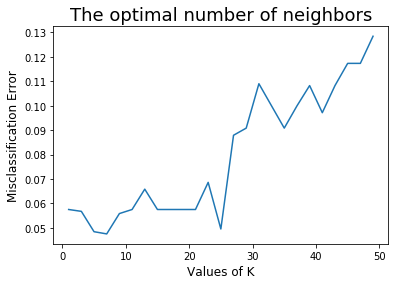

In [23]:
cv_list = []
k_values = range(1,50,2)

for k in k_values:
    kclassifier = KNeighborsClassifier(n_neighbors=k)
    cross_val_scr = cross_val_score(kclassifier, train_data,train_labels, cv=10, scoring='accuracy')
    cv_list.append(cross_val_scr.mean())
    
misclassifiaction_error = []
for x in cv_list:
    y = 1-x
    misclassifiaction_error.append(y)
plt.xlabel('Values of K', fontsize=12)
plt.ylabel('Misclassification Error', fontsize=12)
plt.title('The optimal number of neighbors', fontsize=18)
plt.plot(k_values, misclassifiaction_error)

plt.show()

This graph shows the Misclassification Error for odd values of K ranging from 1 to 50.To pick the right K , there are multiple approaches.Over here, we pick the K value for which Misclassification Error is minimum.The best K value for this model happens to be 7!

In [24]:
min_val = min(misclassifiaction_error)
k_val = k_values[misclassifiaction_error.index(min_val)]
print(k_val)

7


## Ideas for extension

1) Consider distance measure : The weighted voting approach can further be expanded to consider the distance. The increamental factor which is harmonic can be replaced to 1 / (dist**2 + 1) to achieve this.<br>
2) Regression : KNN can also be used for regression problems(that is not just qualitative values but can be used for quantitive values). The closest value can be compyted by taking the mean or median of the predicted attribute. <br>
3) Normalization : Rescaling the data can make the model more impactful.If we consider two features , height and weight such that height = 190 and weight = 90 , this will skew the metrics in favor of height .Therefore, normalizing the data will be helpful


## Further Resources

1) http://ieeexplore.ieee.org/document/6783471/?reload=true <br>
2) https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/ <br>
3) https://www.sciencedirect.com/science/article/pii/S209012321200046X <br>
4) https://link.springer.com/chapter/10.1007/978-3-642-20367-1_51 <br>
5) https://link.springer.com/chapter/10.1007/978-3-319-14717-8_39

## References

1) https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/ <br>
2) https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification <br>
3) https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ <br>
4) https://www.python-course.eu/k_nearest_neighbor_classifier.php <br>
5) https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn <br>
6) https://medium.com/data-science-group-iitr/k-nearest-neighbors-knn-500f0d17c8f1 <br>
7) https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation <br>